In [2]:
# Carregando o dataset
from sklearn.datasets import fetch_openml
import pandas as pd

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
# DESCR: descreve o dataset
# data: matriz de dados
# target: array com os rotulos

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# Separando os dados
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


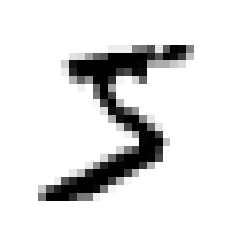

In [5]:
# Visualizando um exemplo
import matplotlib.pyplot as plt

some_digit = X.iloc[[0]]
# Cada imagem é um array de 784 valores (28x28) representando cada pixel
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.axis("off")
plt.show()

In [6]:
# Os rotolus sao strings, precisamos converter em inteiros
y[0]

'5'

In [7]:
import numpy as np

y = y.astype(np.uint8)
y[0]

5

In [8]:
# Separando os dados em treinamento e teste
# Porem o conjunto já está separado em treinamento e teste
# Os ultimos 10000 dados são para teste
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
# Treinando o modelo
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
some_digit_scores = svm_clf.decision_function(some_digit)
# Exibe o score de cada rotulo
print(some_digit_scores)

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]


In [10]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
# Validacao cruzada
from sklearn.model_selection import cross_val_score

cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)

array([0.977 , 0.9738, 0.9739])

In [12]:
# Tentando melhorar com o escalonamento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9596, 0.9602, 0.961 ])

In [13]:
# Analisando o erro
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(svm_clf, X_train_scaled, y_train, cv=3, n_jobs=-1)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[5809    3   20    8    6   13   32   14   17    1]
 [   1 6620   37   12   11    0    7   31   13   10]
 [  20   18 5721   42   27    4   20   61   36    9]
 [   3   15   83 5778    5   64    2   87   73   21]
 [   5   11   45    2 5623    6   21   25   10   94]
 [  14   11   16   77   17 5134   58   50   28   16]
 [  20    7   22    0   13   39 5743   55   19    0]
 [   9   24   37   15   39    1    0 6070    5   65]
 [  19   44   42   50   20   52   26   40 5533   25]
 [  11   10   25   49   81   12    1  153   22 5585]]


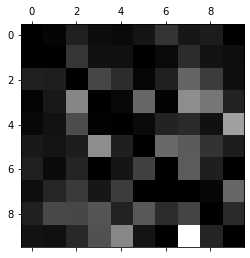

In [14]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [15]:
# Ex 1 - Melhorando a acuracia
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"weights": ["uniform", "distance"], "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
]

knc = KNeighborsClassifier()
grid_search = GridSearchCV(knc, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 4, 'weights': 'distance'}
0.9437666666666668


In [16]:
# Testando sem escalonamento
knc = KNeighborsClassifier()
grid_search = GridSearchCV(knc, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 4, 'weights': 'distance'}
0.9703500000000002


In [17]:
# Testando no conjunto de teste
y_test_pred = grid_search.predict(X_test)
conf_mx = confusion_matrix(y_test, y_test_pred)
print(conf_mx)

[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  10    5  995    2    1    0    0   16    3    0]
 [   0    1    3  974    1   14    1    7    4    5]
 [   1    5    0    0  950    0    4    3    0   19]
 [   4    0    0    9    2  862    7    1    3    4]
 [   4    2    0    0    3    3  946    0    0    0]
 [   0   17    4    0    3    0    0  994    0   10]
 [   5    2    4   14    5   11    4    4  920    5]
 [   3    4    2    7    9    4    1   10    1  968]]


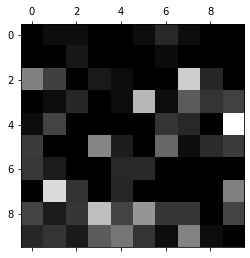

In [18]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [19]:
# acuracia do modelo
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9714

In [55]:
# Ex 2 - Data Augmentation
from scipy.ndimage.interpolation import shift

X_aug_train_list = []
y_aug_train_list = []

for index, row in X_train.iterrows():

  digit = row.values.reshape(28, 28)

  right_shift = shift(digit, [1,0], cval=0)
  left_shift = shift(digit, [-1,0], cval=0)
  top_shift = shift(digit, [0,1], cval=0)
  bottom_shift = shift(digit, [0,-1], cval=0)

  X_aug_train_list.append(row.values)
  X_aug_train_list.append(right_shift.reshape(-1))
  X_aug_train_list.append(left_shift.reshape(-1))
  X_aug_train_list.append(top_shift.reshape(-1))
  X_aug_train_list.append(bottom_shift.reshape(-1))

  y_aug_train_list.extend([y_train[index]] * 5)


In [61]:
print(len(X_aug_train_list))
print(len(y_aug_train_list))
print(X_train.shape)

300000
300000
(60000, 784)


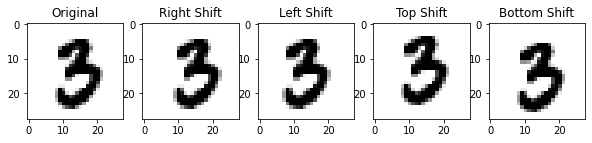

In [66]:
# Exemplo

some_digit = X.iloc[[890]]
# Cada imagem é um array de 784 valores (28x28) representando cada pixel
some_digit_image = some_digit.values.reshape(28, 28)
some_digit_image_shifted_right = shift(some_digit_image, [0, 1], cval=0)
some_digit_image_shifted_left = shift(some_digit_image, [0, -1], cval=0)
some_digit_image_shifted_top = shift(some_digit_image, [-1, 0], cval=0)
some_digit_image_shifted_bottom = shift(some_digit_image, [1, 0], cval=0)

plt.figure(figsize=(10, 10))
plt.subplot(1, 5, 1)
plt.title("Original")
plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.subplot(1, 5, 2)
plt.title("Right Shift")
plt.imshow(some_digit_image_shifted_right, cmap=plt.cm.binary)
plt.subplot(1, 5, 3)
plt.title("Left Shift")
plt.imshow(some_digit_image_shifted_left, cmap=plt.cm.binary)
plt.subplot(1, 5, 4)
plt.title("Top Shift")
plt.imshow(some_digit_image_shifted_top, cmap=plt.cm.binary)
plt.subplot(1, 5, 5)
plt.title("Bottom Shift")
plt.imshow(some_digit_image_shifted_bottom, cmap=plt.cm.binary)
plt.show()


In [67]:
# Embaralhando os novos dados da amostra
from sklearn.utils import shuffle

shuffle_index = np.random.permutation(len(X_aug_train_list))
X_aug_train = np.array(X_aug_train_list)[shuffle_index]
y_aug_train = np.array(y_aug_train_list)[shuffle_index]

In [68]:
# Treinando com a nova base de dados
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

knn_clf.fit(X_aug_train, y_aug_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [69]:
# Testando no conjunto de teste o modelo treinado com a nova base de dados

y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

e:\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.9763